In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,BatchNormalization,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam

In [4]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
        
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create image data generators
train_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory( 
    "dogs_vs_cats/train",  # path of main directory 
    target_size=(150, 150),  # resizing all the images to 150x150
    batch_size=32,  # batch size of 32 images per batch
    class_mode="binary"  # binary class mode for binary crossentropy loss
)

# For validation set
val_gen = ImageDataGenerator(rescale=1./255)

val_data = val_gen.flow_from_directory(  # Use val_gen instead of train_gen here
    "dogs_vs_cats/test",  
    target_size=(150, 150),  
    batch_size=32, 
    class_mode="binary"
)

# Creating CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))  # Fix input shape
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
___________________________________

## Data Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_data = train_gen.flow_from_directory( 
    "dogs_vs_cats/train", # path of main directory 
    target_size = (150 ,150) , # resizing all the images to 150x150
    batch_size = 32 , #images are taken from the directory in batches and we are taking 128 image per batch
    class_mode = "binary" # we use binary class mode as loss funtion is using binary crossentropy and output is binary
)

#for validation set 
val_gen = ImageDataGenerator(rescale = 1/255)

val_data = val_gen.flow_from_directory( 
    "dogs_vs_cats/test",  
    target_size = (150 ,150) , 
    batch_size = 32 , 
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [29]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))  # Fix input shape
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [31]:
h1=model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 117s 185ms/step - loss: 0.9000 - accuracy: 0.6120 - val_loss: 0.9148 - val_accuracy: 0.6930
Epoch 2/10
625/625 [==============================] - 120s 193ms/step - loss: 0.5569 - accuracy: 0.7258 - val_loss: 0.4943 - val_accuracy: 0.7678
Epoch 3/10
625/625 [==============================] - 119s 190ms/step - loss: 0.4673 - accuracy: 0.7897 - val_loss: 0.6151 - val_accuracy: 0.7068
Epoch 4/10
625/625 [==============================] - 116s 186ms/step - loss: 0.3984 - accuracy: 0.8295 - val_loss: 0.3453 - val_accuracy: 0.8554
Epoch 5/10
625/625 [==============================] - 159s 254ms/step - loss: 0.3435 - accuracy: 0.8579 - val_loss: 0.3573 - val_accuracy: 0.8406
Epoch 6/10
625/625 [==============================] - 121s 193ms/step - loss: 0.3075 - accuracy: 0.8781 - val_loss: 0.4252 - val_accuracy: 0.8240
Epoch 7/10
625/625 [==============================] - 123s 197ms/step - loss: 0.2877 - accuracy: 0.8843 - val_loss: 0.3499 -

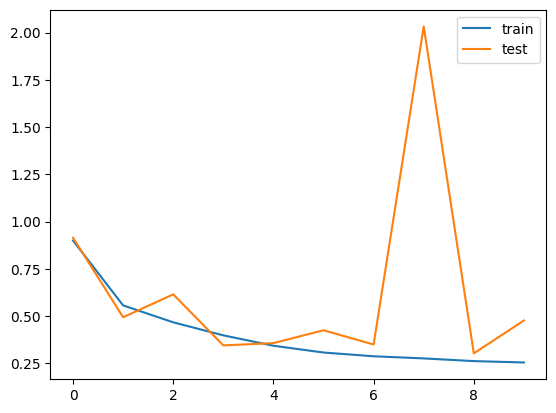

In [82]:
plt.plot(h1.history['loss'],label='train')
plt.plot(h1.history['val_loss'],label='test')
plt.legend()
plt.show()

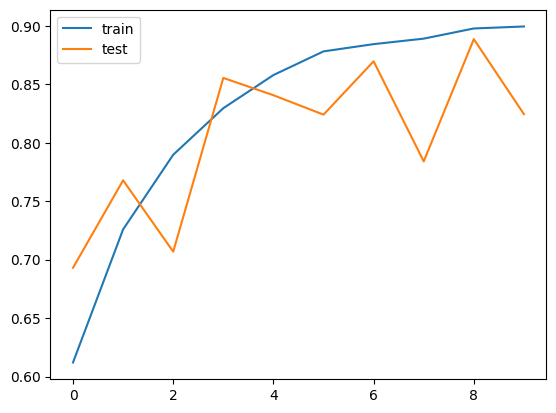

In [81]:
plt.plot(h2.history['accuracy'],label='train')
plt.plot(h2.history['val_accuracy'],label='test')
plt.legend()
plt.show()

# Transfer Learning

### Using VGG

In [37]:
from keras.applications.vgg16 import VGG16

In [38]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58900480/58889256 [==============================] - 5s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [42]:
conv_base.trainable=False

In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_data = train_gen.flow_from_directory( 
    "dogs_vs_cats/train", # path of main directory 
    target_size = (150 ,150) , # resizing all the images to 150x150
    batch_size = 32 , #images are taken from the directory in batches and we are taking 128 image per batch
    class_mode = "binary" # we use binary class mode as loss funtion is using binary crossentropy and output is binary
)

#for validation set 
val_gen = ImageDataGenerator(rescale = 1/255)

val_data = val_gen.flow_from_directory( 
    "dogs_vs_cats/test",  
    target_size = (150 ,150) , 
    batch_size = 32 , 
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [45]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [46]:
h2=model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 186s 287ms/step - loss: 0.3875 - accuracy: 0.8366 - val_loss: 0.2206 - val_accuracy: 0.9076
Epoch 2/10
625/625 [==============================] - 180s 287ms/step - loss: 0.2685 - accuracy: 0.8842 - val_loss: 0.2126 - val_accuracy: 0.9160
Epoch 3/10
625/625 [==============================] - 170s 271ms/step - loss: 0.2446 - accuracy: 0.8951 - val_loss: 0.2355 - val_accuracy: 0.9056
Epoch 4/10
625/625 [==============================] - 173s 277ms/step - loss: 0.2289 - accuracy: 0.9031 - val_loss: 0.2032 - val_accuracy: 0.9198
Epoch 5/10
625/625 [==============================] - 175s 280ms/step - loss: 0.2142 - accuracy: 0.9107 - val_loss: 0.2100 - val_accuracy: 0.9144
Epoch 6/10
625/625 [==============================] - 167s 267ms/step - loss: 0.2061 - accuracy: 0.9145 - val_loss: 0.2144 - val_accuracy: 0.9156
Epoch 7/10
625/625 [==============================] - 163s 260ms/step - loss: 0.2018 - accuracy: 0.9166 - val_loss: 0.2036 -

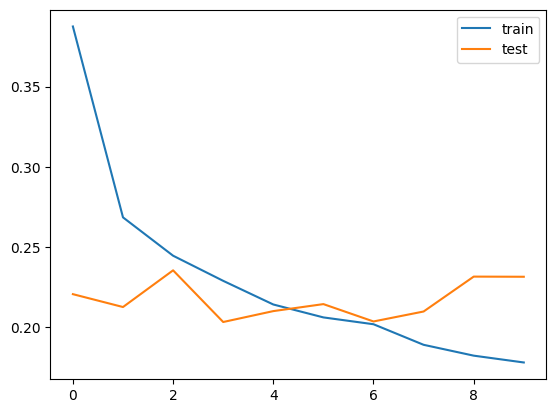

In [49]:
plt.plot(h2.history['loss'],label='train')
plt.plot(h2.history['val_loss'],label='test')
plt.legend()
plt.show()

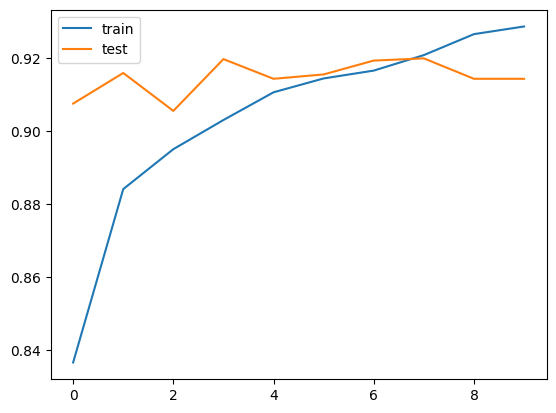

In [50]:
plt.plot(h2.history['accuracy'],label='train')
plt.plot(h2.history['val_accuracy'],label='test')
plt.legend()
plt.show()